# Exploratory Data Analysis of Mutual Funds Dataset

## Project Objective
The objective of this project is to perform an in-depth Exploratory Data Analysis (EDA) on a mutual funds dataset to understand fund characteristics, return patterns, risk metrics, and portfolio composition.

This analysis focuses on:
- Understanding the distribution of key numerical features such as returns, AUM, and risk indicators
- Identifying patterns and variability across different mutual funds
- Exploring insights related to fund performance and volatility


This is a **pure EDA project**, aimed at extracting meaningful insights through visualization and statistical exploration.


In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

## Loading the Mutual Fund Dataset

In [2]:
# Load the dataset
df = pd.read_csv("Mutual Fund Dataset 2025.csv")

# Display first 5 rows
df.head()

,Funds,Fund Manager,Category,RupeeVestRating,AUM(in Rs. cr),ExpenseRatio (%),Fund Type,Inception Date,Benchmark Index,NAV,...,Avg. Maturity(in yrs),Mod. Duration(in yrs),Yield To Maturity (%),Alpha,Sharpe,Sortino,Beta,Standard Deviation,classification,Exit_load_Remarks
0,360 ONE Balanced Hybrid Fund-Reg(G),Mayur Patel,HY-EQ,Unrated,860.1,1.94,Open Ended,25-Sep-23,NIFTY 50 Hybrid Composite Debt 50:50 Index,12.45,...,2.93,-,7.39,8.27,1.58,2.28,1.2,7.5,Hybrid : Equity Oriented,Nil upto 10% of units and 1% for remaining uni...
1,360 ONE Dynamic Bond Fund-Reg(G),Milan Mody,DT-DYN,2,737.5,0.52,Open Ended,24-Jun-13,CRISIL Dynamic Bond Index,21.5,...,6.85,-,7.35,3.5,3.72,6.7,0.64,1.45,Debt : Dynamic Bond,Nil
2,360 ONE ELSS Tax Saver Nifty 50 Index Fund-Reg(G),Parijat Garg,EQ-ELSS,Unrated,75.8,0.52,Open Ended,28-Dec-22,NIFTY 50 - TRI,13.45,...,-,-,-,1.51,0.47,0.71,0.99,13.9,Equity : Tax Saving (ELSS),Nil
3,360 ONE Flexicap Fund-Reg(G),Mayur Patel,EQ-FLEX,Unrated,1254.2,2.08,Open Ended,30-Jun-23,BSE 500 - TRI,15.33,...,-,-,-,16.98,1.4,2.02,0.92,15.45,Equity : Flexi Cap,1% on or before 365D Nil after 365D
4,360 ONE Focused Equity Fund-Reg(G),Mayur Patel,EQ-MLC,4,7305,1.78,Open Ended,30-Oct-14,BSE 500 - TRI,46.19,...,-,-,-,6.25,0.71,1,1.02,16.03,Equity : Multi Cap,1% on or before 12M


In this step, we load the Mutual Fund dataset using pandas.
Displaying the first few rows helps us understand the structure of the dataset, the types of variables present, and the kind of financial information available for analysis.

## Dataset Size and Structure

In [3]:
# Dataset shape (rows, columns)
df.shape

(1797, 37)

The shape of the dataset tells us how many observations (rows) and features (columns) are present.
A higher number of rows improves statistical reliability, while a diverse set of columns allows deeper exploratory analysis.

## Column Overview

In [4]:
df.columns

Index(['Funds', 'Fund Manager', 'Category', 'RupeeVestRating',
       'AUM(in Rs. cr)', 'ExpenseRatio (%)', 'Fund Type', 'Inception Date',
       'Benchmark Index', ' NAV ', ' 52 WeekHigh (NAV)', ' 52 WeekLow (NAV)',
       'Return (%)1 mo', 'Return (%)3 mo', 'Return (%)6 mo', 'Return (%)1 yr',
       'Return (%)2 yrs', 'Return (%)3 yrs', 'Return (%)5 yrs',
       'Return (%)10 yrs', 'Turnover Ratio (%)', ' No. ofStocks',
       'Avg. Market Cap(in Rs. cr)', 'Large Cap(%)', 'Mid Cap(%)',
       'Small Cap(%)', 'Highest Sector', 'Avg. Maturity(in yrs)',
       'Mod. Duration(in yrs)', 'Yield To Maturity (%)', 'Alpha', 'Sharpe',
       'Sortino', 'Beta', 'Standard Deviation', 'classification',
       'Exit_load_Remarks'],
      dtype='object')

This step provides a complete list of variables available in the dataset.
Understanding column names helps identify what each feature represents and guides further exploratory analysis such as classification into numerical and categorical variables.

## Data Types and Structure

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Funds                       1797 non-null   object
 1   Fund Manager                1797 non-null   object
 2   Category                    1797 non-null   object
 3   RupeeVestRating             1797 non-null   object
 4   AUM(in Rs. cr)              1797 non-null   object
 5   ExpenseRatio (%)            1797 non-null   object
 6   Fund Type                   1797 non-null   object
 7   Inception Date              1797 non-null   object
 8   Benchmark Index             1796 non-null   object
 9    NAV                        1797 non-null   object
 10   52 WeekHigh (NAV)          1797 non-null   object
 11   52 WeekLow (NAV)           1797 non-null   object
 12  Return (%)1 mo              1797 non-null   object
 13  Return (%)3 mo              1797 non-null   obje

This step helps understand the structure of the dataset by showing data types, non-null counts, and memory usage.
It allows us to identify numerical, categorical, and datetime variables, and gives early insight into missing values and potential preprocessing needs.

## Missing Values Analysis

In [6]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

Exit_load_Remarks             293
Benchmark Index                 1
Mod. Duration(in yrs)           0
 No. ofStocks                   0
Avg. Market Cap(in Rs. cr)      0
Large Cap(%)                    0
Mid Cap(%)                      0
Small Cap(%)                    0
Highest Sector                  0
Avg. Maturity(in yrs)           0
Yield To Maturity (%)           0
Return (%)10 yrs                0
Alpha                           0
Sharpe                          0
Sortino                         0
Beta                            0
Standard Deviation              0
classification                  0
Turnover Ratio (%)              0
Funds                           0
Fund Manager                    0
 NAV                            0
Category                        0
RupeeVestRating                 0
AUM(in Rs. cr)                  0
ExpenseRatio (%)                0
Fund Type                       0
Inception Date                  0
 52 WeekHigh (NAV)              0
Return (%)3 yr

This analysis shows the count of missing values in each column.
Understanding missing data patterns helps decide whether values should be imputed, left as-is, or excluded during analysis.
Columns with high missing values may represent data that is only relevant to specific fund types

## Missing Values Percentage

In [7]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage.sort_values(ascending=False)
missing_percentage

Exit_load_Remarks             16.304953
Benchmark Index                0.055648
Mod. Duration(in yrs)          0.000000
 No. ofStocks                  0.000000
Avg. Market Cap(in Rs. cr)     0.000000
Large Cap(%)                   0.000000
Mid Cap(%)                     0.000000
Small Cap(%)                   0.000000
Highest Sector                 0.000000
Avg. Maturity(in yrs)          0.000000
Yield To Maturity (%)          0.000000
Return (%)10 yrs               0.000000
Alpha                          0.000000
Sharpe                         0.000000
Sortino                        0.000000
Beta                           0.000000
Standard Deviation             0.000000
classification                 0.000000
Turnover Ratio (%)             0.000000
Funds                          0.000000
Fund Manager                   0.000000
 NAV                           0.000000
Category                       0.000000
RupeeVestRating                0.000000
AUM(in Rs. cr)                 0.000000


This step converts missing value counts into percentages, making it easier to identify columns with significant data gaps.
Columns with very high missing percentages may be excluded from certain analyses or treated separately depending on relevance.

## Statistical Summary of Numerical Features

In [8]:
df.describe().T

,count,unique,top,freq
Funds,1797,1797,360 ONE Balanced Hybrid Fund-Reg(G),1
Fund Manager,1797,377,Nishit Patel,46
Category,1797,50,EQ-INDX,176
RupeeVestRating,1797,6,Unrated,1203
AUM(in Rs. cr),1797,1682,-,43
ExpenseRatio (%),1797,256,-,145
Fund Type,1797,3,Open Ended,1687
Inception Date,1797,1294,-,8
Benchmark Index,1796,301,NIFTY 500 - TRI,163
NAV,1797,1484,-,8


This table provides a statistical overview of numerical variables, including central tendency, spread, and range.
It helps identify unusual values, large variances, and potential outliers that may require attention during later analysis.

## Duplicate Records Analysis

In [9]:
df.duplicated().sum()

0

This step checks whether identical rows exist in the dataset.
Duplicate records can bias summary statistics and visualizations, so identifying them early ensures data integrity.

## DATA CLEANING & PREPARATION

## Data Type Correction for Numerical Features

In [10]:
# Find object-type columns
object_cols = df.select_dtypes(include='object').columns

# Step 2: Try converting them to numeric
numeric_object_cols = []

for col in object_cols:
    converted = pd.to_numeric(df[col], errors='coerce')
    
    # If conversion produces numeric values (not all NaN), keep it
    if converted.notna().sum() > 0:
        numeric_object_cols.append(col)
        df[col] = converted

numeric_object_cols

['RupeeVestRating',
 'AUM(in Rs. cr)',
 'ExpenseRatio (%)',
 ' NAV ',
 ' 52 WeekHigh (NAV)',
 ' 52 WeekLow (NAV)',
 'Return (%)1 mo',
 'Return (%)3 mo',
 'Return (%)6 mo',
 'Return (%)1 yr',
 'Return (%)2 yrs',
 'Return (%)3 yrs',
 'Return (%)5 yrs',
 'Return (%)10 yrs',
 'Turnover Ratio (%)',
 ' No. ofStocks',
 'Avg. Market Cap(in Rs. cr)',
 'Large Cap(%)',
 'Mid Cap(%)',
 'Small Cap(%)',
 'Avg. Maturity(in yrs)',
 'Mod. Duration(in yrs)',
 'Yield To Maturity (%)',
 'Alpha',
 'Sharpe',
 'Sortino',
 'Beta',
 'Standard Deviation']

All numerical columns were converted to appropriate numeric data types.  
Any invalid or non-numeric values were safely converted into missing values (NaN) to maintain data integrity and prevent errors during analysis.

In [11]:
# Force AUM column to numeric (safe conversion)
df['AUM(in Rs. cr)'] = (
    df['AUM(in Rs. cr)']
    .astype(str)
    .str.replace(',', '')
    .str.strip()
)

df['AUM(in Rs. cr)'] = pd.to_numeric(df['AUM(in Rs. cr)'], errors='coerce')

# Verify
df['AUM(in Rs. cr)'].dtype


dtype('float64')

## Date Format Correction

In [12]:
df['Inception Date'] = pd.to_datetime(df['Inception Date'], errors='coerce')

df['Inception Date'].dtype

dtype('<M8[ns]')

The inception date column was successfully converted to datetime format.  
Any invalid or improperly formatted dates were converted into missing values (NaT), ensuring consistency and preventing downstream errors.

## Handling Missing Values

In [13]:
# Missing values by column (descending order)
missing_counts = df.isnull().sum().sort_values(ascending=False)

missing_counts[missing_counts > 0]

RupeeVestRating               1203
Mod. Duration(in yrs)         1165
Return (%)10 yrs              1158
Yield To Maturity (%)         1134
Avg. Maturity(in yrs)         1123
Small Cap(%)                   992
Return (%)5 yrs                882
Large Cap(%)                   803
Mid Cap(%)                     780
Avg. Market Cap(in Rs. cr)     773
 No. ofStocks                  737
Return (%)3 yrs                659
Return (%)2 yrs                440
Turnover Ratio (%)             364
Beta                           333
Exit_load_Remarks              293
Standard Deviation             254
Sortino                        253
Sharpe                         253
Alpha                          253
Return (%)1 yr                 251
Return (%)6 mo                 155
ExpenseRatio (%)               145
Return (%)3 mo                  91
AUM(in Rs. cr)                  43
Return (%)1 mo                  42
 52 WeekLow (NAV)                8
 52 WeekHigh (NAV)               8
 NAV                

In [14]:
# Fill Exit_load_Remarks
df['Exit_load_Remarks'] = df['Exit_load_Remarks'].fillna('Not Available')

# Fill Benchmark Index with mode
benchmark_mode = df['Benchmark Index'].mode()[0]
df['Benchmark Index'] = df['Benchmark Index'].fillna(benchmark_mode)

# Fill Inception Date with median date
median_date = df['Inception Date'].median()
df['Inception Date'] = df['Inception Date'].fillna(median_date)

# Verify missing values again
df[['Exit_load_Remarks', 'Benchmark Index', 'Inception Date']].isna().sum()


Exit_load_Remarks    0
Benchmark Index      0
Inception Date       0
dtype: int64

Missing values were handled using domain-aware strategies.  
Categorical attributes were imputed using the most frequent or descriptive placeholder values, while missing inception dates were filled using the median date to preserve temporal consistency.

## Outlier Detection

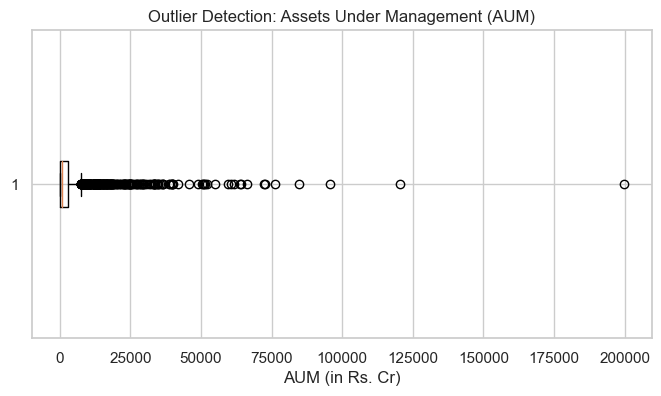

In [15]:
plt.figure(figsize=(8, 4))
plt.boxplot(df['AUM(in Rs. cr)'].dropna(), vert=False)
plt.xlabel('AUM (in Rs. Cr)')
plt.title('Outlier Detection: Assets Under Management (AUM)')
plt.show()

The AUM distribution is highly right-skewed, indicating that while most funds manage relatively
lower assets, a few funds hold exceptionally large AUM values. These outliers are genuine
market characteristics and are retained for further analysis rather than removed.

## Feature Classification

In [16]:
categorical_cols = df.select_dtypes(include="object").columns.tolist()
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

categorical_cols, numerical_cols

(['Funds',
  'Fund Manager',
  'Category',
  'Fund Type',
  'Benchmark Index',
  'Highest Sector',
  'classification',
  'Exit_load_Remarks'],
 ['RupeeVestRating',
  'AUM(in Rs. cr)',
  'ExpenseRatio (%)',
  ' NAV ',
  ' 52 WeekHigh (NAV)',
  ' 52 WeekLow (NAV)',
  'Return (%)1 mo',
  'Return (%)3 mo',
  'Return (%)6 mo',
  'Return (%)1 yr',
  'Return (%)2 yrs',
  'Return (%)3 yrs',
  'Return (%)5 yrs',
  'Return (%)10 yrs',
  'Turnover Ratio (%)',
  ' No. ofStocks',
  'Avg. Market Cap(in Rs. cr)',
  'Large Cap(%)',
  'Mid Cap(%)',
  'Small Cap(%)',
  'Avg. Maturity(in yrs)',
  'Mod. Duration(in yrs)',
  'Yield To Maturity (%)',
  'Alpha',
  'Sharpe',
  'Sortino',
  'Beta',
  'Standard Deviation'])

Features are classified into categorical and numerical variables to guide the type of analysis and visualization used in later stages.
Categorical variables are explored using frequency-based plots, while numerical variables are analyzed using distribution and spread-based plots.

## Distribution of Fund Categories

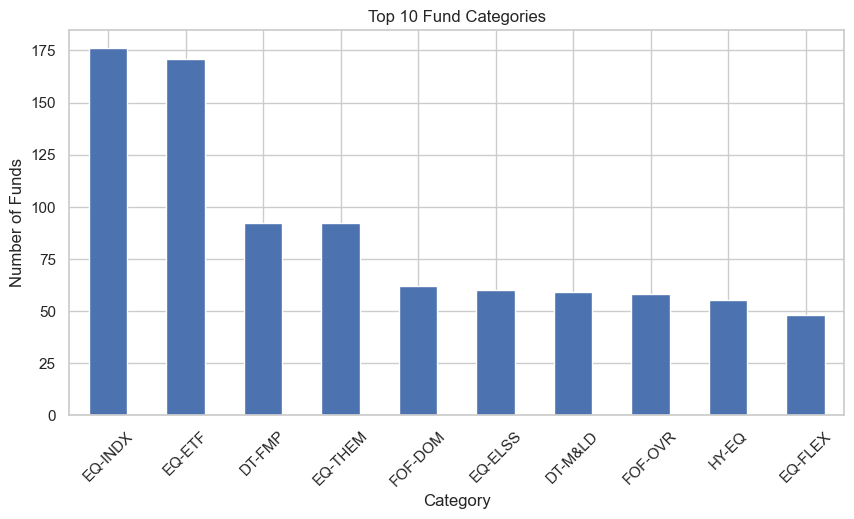

In [17]:
# Which fund categories are most common in the dataset?

plt.figure(figsize=(10, 5))
df["Category"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Fund Categories")
plt.xlabel("Category")
plt.ylabel("Number of Funds")
plt.xticks(rotation=45)
plt.show()

This bar chart shows the most common fund categories in the dataset.
A higher bar indicates that more funds belong to that category, suggesting greater popularity or availability of those fund types in the market.
The dominance of a few categories also indicates potential class imbalance, which is important to note during comparative analysis.

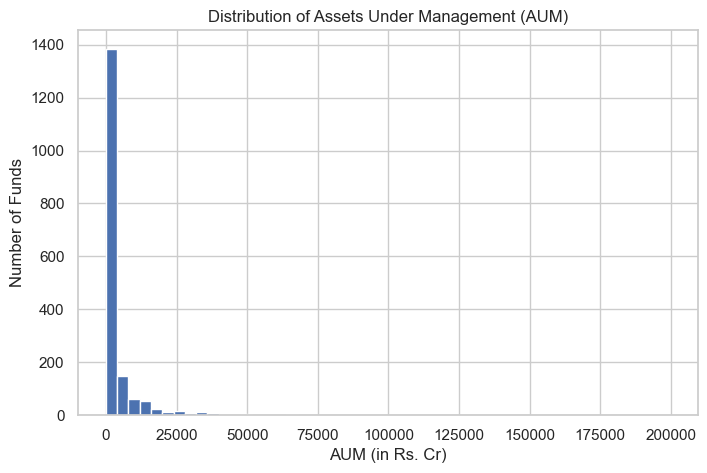

In [18]:
plt.figure()
plt.hist(df['AUM(in Rs. cr)'].dropna(), bins=50)
plt.xlabel('AUM (in Rs. Cr)')
plt.ylabel('Number of Funds')
plt.title('Distribution of Assets Under Management (AUM)')
plt.show()

The AUM distribution is highly right-skewed, indicating that while most mutual funds manage relatively smaller assets, a few funds control extremely large AUM values. This imbalance causes the distribution to deviate significantly from normality and highlights the dominance of large funds in the market.

## Univariate Analysis – Categorical Variables

### Distribution of Fund Types

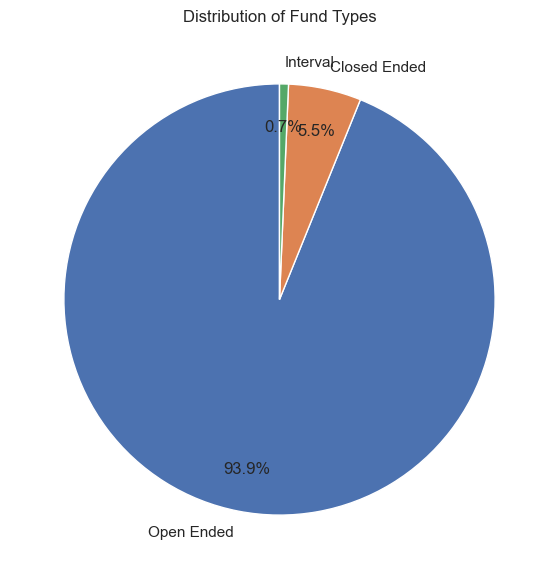

In [24]:
plt.figure(figsize=(7, 7))

plt.pie(
    fund_type_counts,
    labels=fund_type_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.8,
    labeldistance=1.1
)

plt.title('Distribution of Fund Types')
plt.show()


Open-ended funds dominate the dataset, indicating higher investor preference for liquidity.
Close-ended and other fund types form a much smaller portion of the market.

### Distribution of Fund Categories

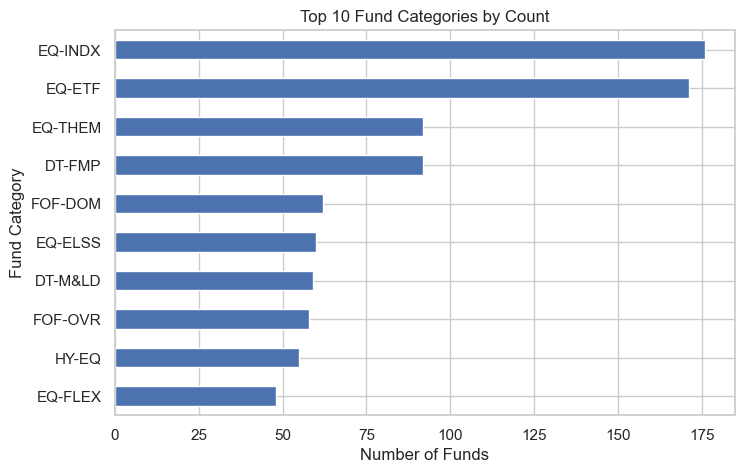

In [25]:
import matplotlib.pyplot as plt

top_categories = df['Category'].value_counts().head(10)

plt.figure(figsize=(8, 5))
top_categories.sort_values().plot(kind='barh')

plt.title('Top 10 Fund Categories by Count')
plt.xlabel('Number of Funds')
plt.ylabel('Fund Category')

plt.show()

The mutual fund market is dominated by a few major categories, with equity-oriented schemes appearing most frequently.
The long tail of less frequent categories highlights the diversity of investment strategies, but also justifies focusing analysis on dominant segments for clearer insights.

### Distribution of RupeeVest Ratings

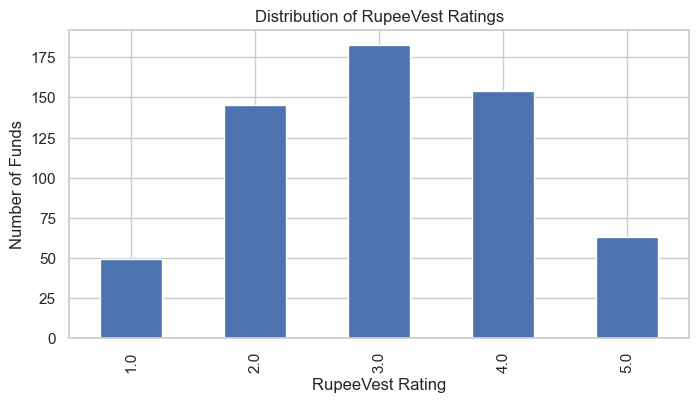

In [21]:
plt.figure(figsize=(8, 4))
df['RupeeVestRating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('RupeeVest Rating')
plt.ylabel('Number of Funds')
plt.title('Distribution of RupeeVest Ratings')
plt.show()

- Most funds fall within mid-range ratings.
- Extremely high or low ratings are less common.
- This suggests moderate risk–return profiles dominate the dataset.

### Distribution of Fund Classifications

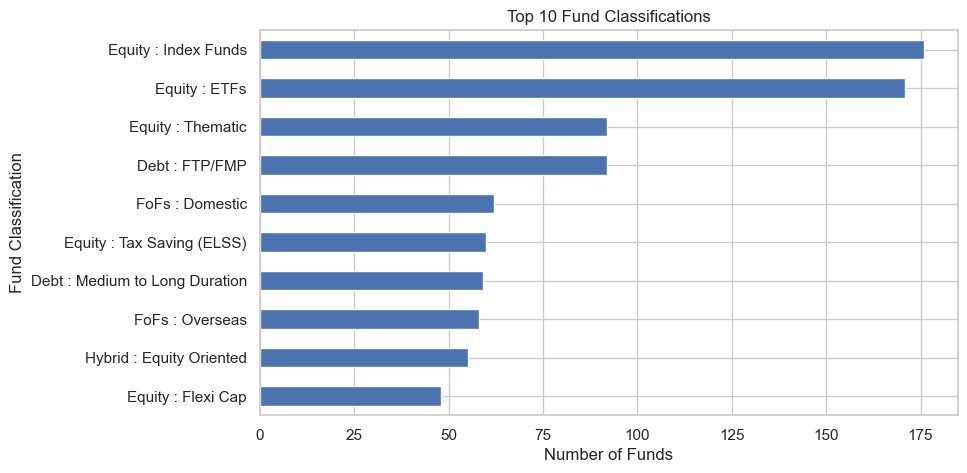

In [26]:
import matplotlib.pyplot as plt

top_classification = df['classification'].value_counts().head(10)

plt.figure(figsize=(9, 5))
top_classification.sort_values().plot(kind='barh')

plt.title('Top 10 Fund Classifications')
plt.xlabel('Number of Funds')
plt.ylabel('Fund Classification')

plt.show()

- Equity-oriented funds form the largest group.
- Debt and hybrid classifications provide diversification options.
- The distribution reflects varying investor risk appetites.

## Univariate Analysis – Numerical Variables

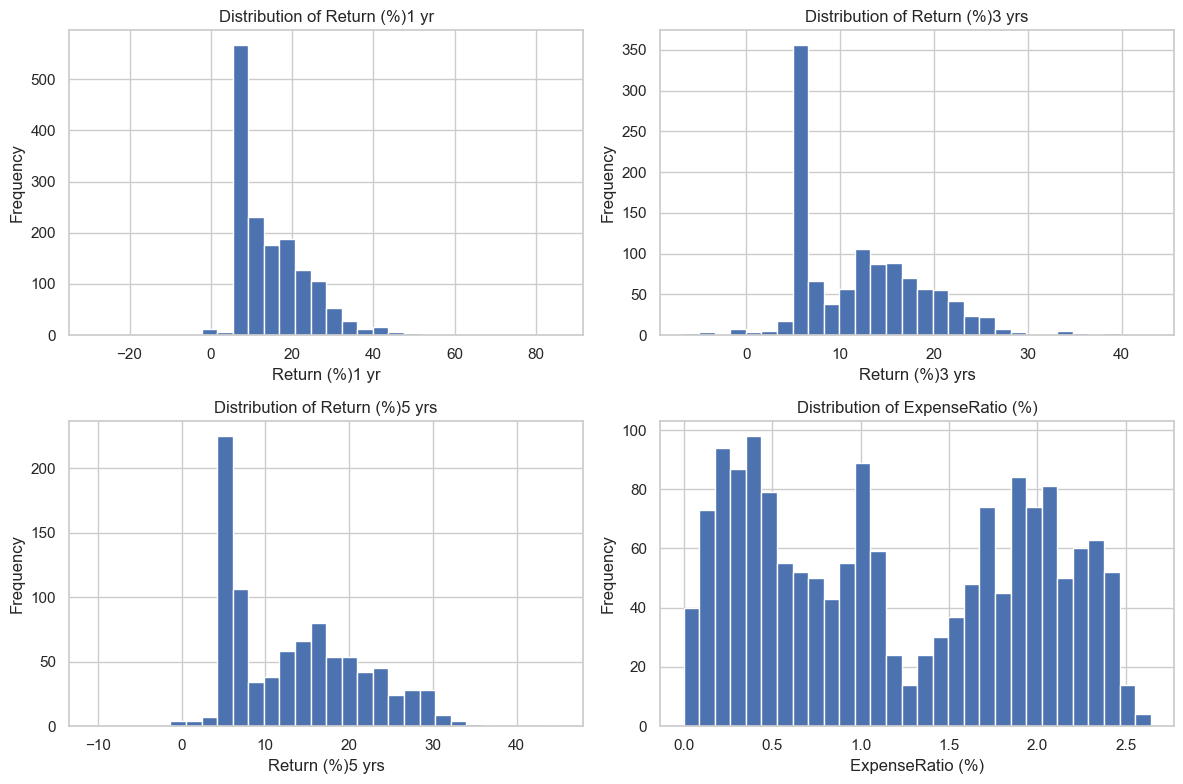

In [29]:
import matplotlib.pyplot as plt

numerical_cols = [
    'Return (%)1 yr',
    'Return (%)3 yrs',
    'Return (%)5 yrs',
    'ExpenseRatio (%)'
]

plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

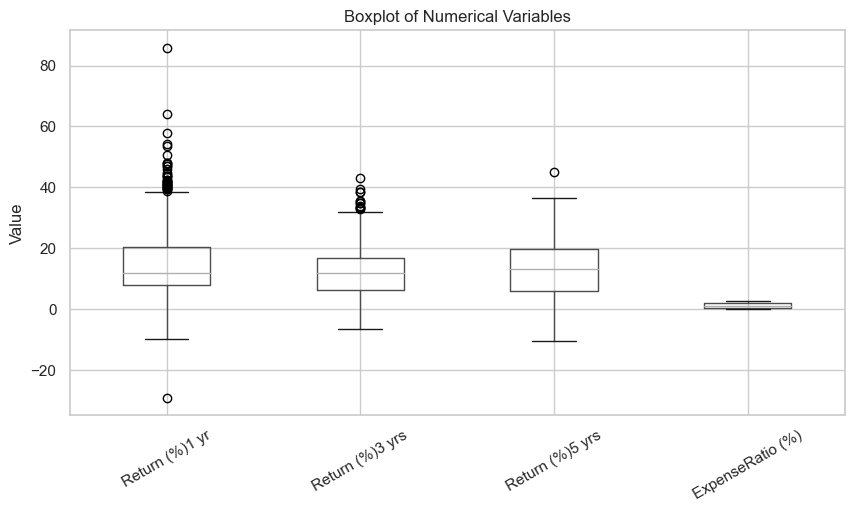

In [30]:
plt.figure(figsize=(10, 5))
df[numerical_cols].boxplot()
plt.title('Boxplot of Numerical Variables')
plt.ylabel('Value')
plt.xticks(rotation=30)
plt.show()

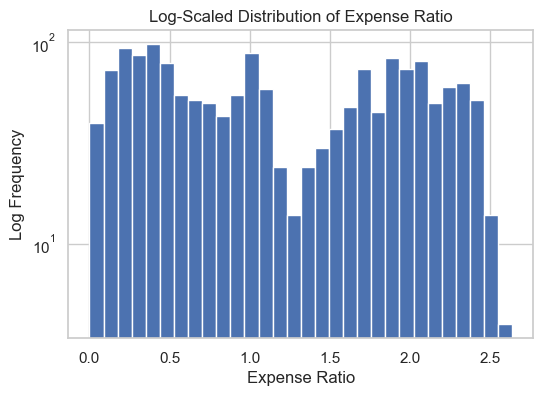

In [32]:
plt.figure(figsize=(6, 4))
plt.hist(df['ExpenseRatio (%)'].dropna(), bins=30)
plt.yscale('log')
plt.title('Log-Scaled Distribution of Expense Ratio')
plt.xlabel('Expense Ratio')
plt.ylabel('Log Frequency')
plt.show()

- Return distributions are slightly right-skewed, indicating more funds with moderate returns and fewer with very high returns.
- Expense ratios show significant outliers, suggesting a small number of high-cost funds.
- Boxplots reveal variability increases with longer return periods.
- Log-scale visualization improves interpretability of skewed expense ratio data.

## Outlier Analysis using Boxplots

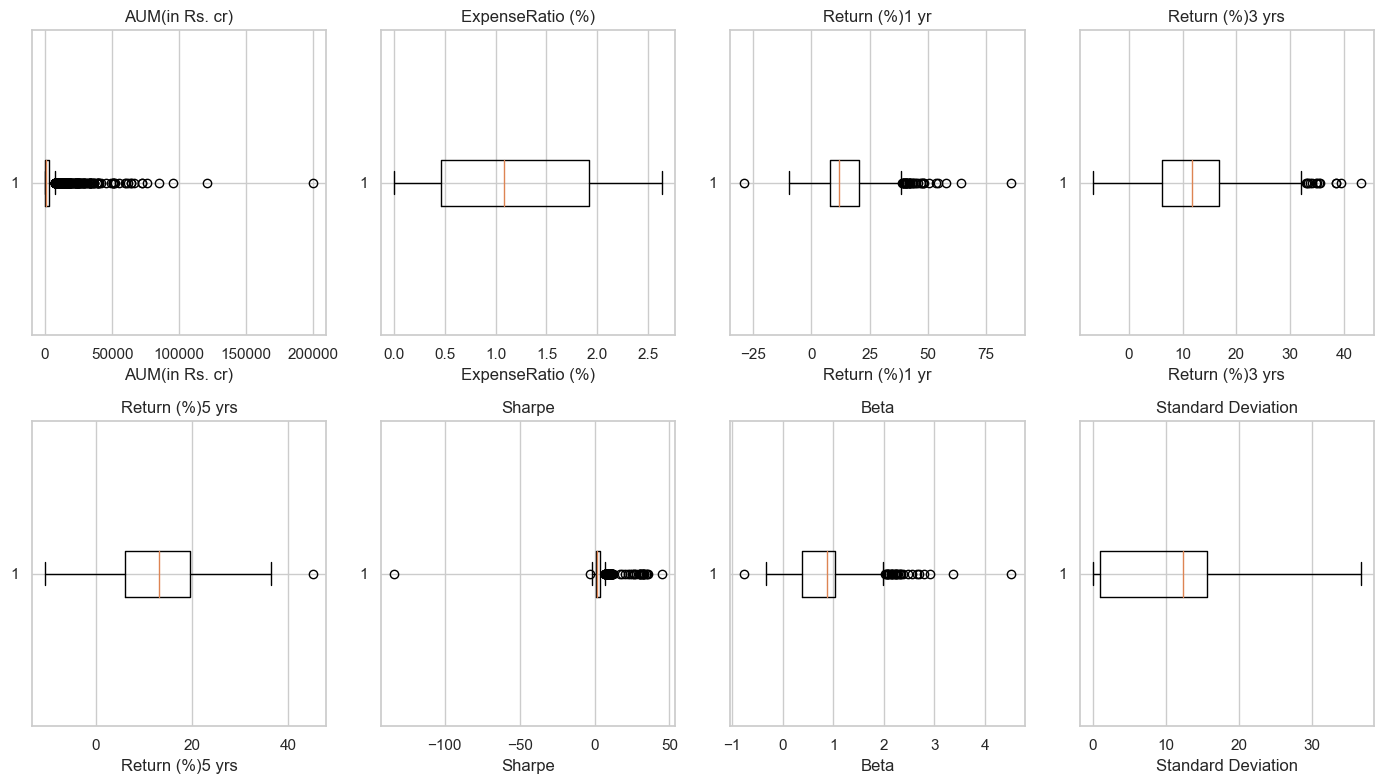

In [33]:
numerical_box_cols = [
    'AUM(in Rs. cr)',
    'ExpenseRatio (%)',
    'Return (%)1 yr',
    'Return (%)3 yrs',
    'Return (%)5 yrs',
    'Sharpe',
    'Beta',
    'Standard Deviation'
]

plt.figure(figsize=(14, 8))

for i, col in enumerate(numerical_box_cols, 1):
    plt.subplot(2, 4, i)
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(col)
    plt.xlabel(col)

plt.tight_layout()
plt.show()


- AUM shows extreme right skew with multiple high-value outliers, representing large institutional funds.
- Return-based variables contain mild outliers, which are expected due to market volatility.
- Risk metrics such as Sharpe and Beta have relatively stable distributions.
- Expense Ratio shows a few high-cost funds that may impact investor returns.

Outliers are retained as they carry important business significance.

## Bivariate Analysis

<Figure size 700x500 with 0 Axes>

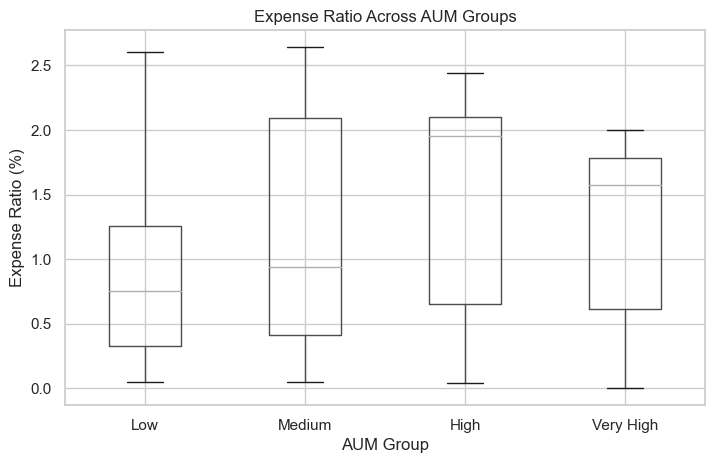

In [35]:
# Create AUM bins
df['AUM_Group'] = pd.qcut(df['AUM(in Rs. cr)'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(7, 5))
df.boxplot(column='ExpenseRatio (%)', by='AUM_Group')
plt.xlabel('AUM Group')
plt.ylabel('Expense Ratio (%)')
plt.title('Expense Ratio Across AUM Groups')
plt.suptitle('')
plt.show()

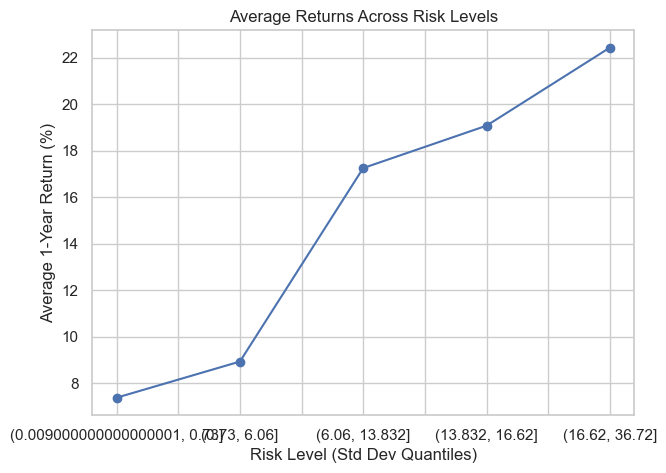

In [36]:
risk_return = df.groupby(pd.qcut(df['Standard Deviation'], 5))['Return (%)1 yr'].mean()

plt.figure(figsize=(7, 5))
risk_return.plot(kind='line', marker='o')
plt.xlabel('Risk Level (Std Dev Quantiles)')
plt.ylabel('Average 1-Year Return (%)')
plt.title('Average Returns Across Risk Levels')
plt.grid(True)
plt.show()

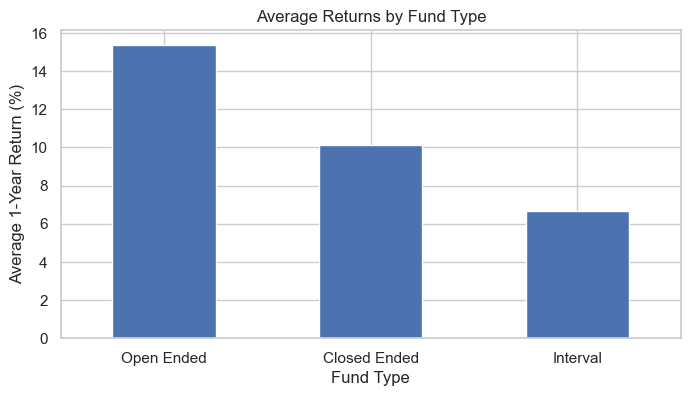

In [37]:
fund_return = df.groupby('Fund Type')['Return (%)1 yr'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
fund_return.plot(kind='bar')
plt.ylabel('Average 1-Year Return (%)')
plt.title('Average Returns by Fund Type')
plt.xticks(rotation=0)
plt.show()

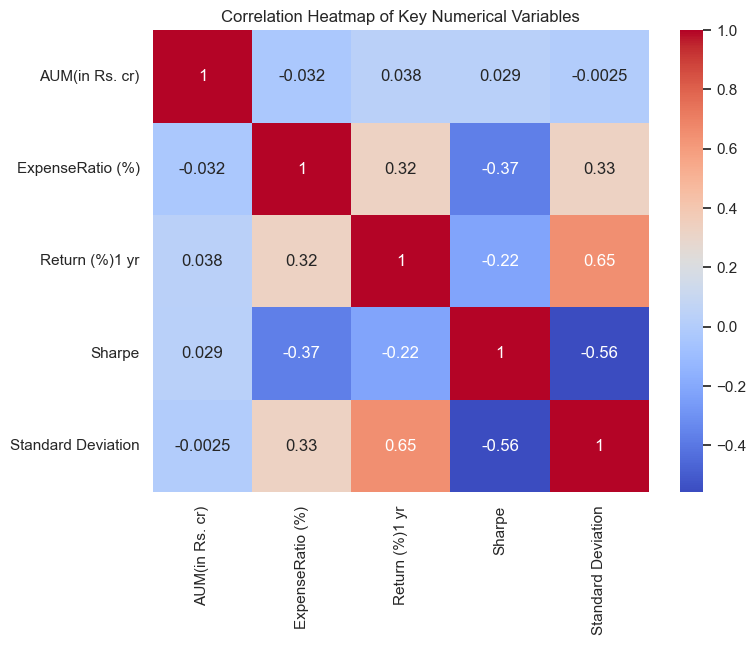

In [38]:
corr_cols = [
    'AUM(in Rs. cr)', 'ExpenseRatio (%)',
    'Return (%)1 yr', 'Sharpe',
    'Standard Deviation'
]

plt.figure(figsize=(8, 6))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Key Numerical Variables')
plt.show()

- Funds with higher AUM tend to have lower expense ratios, indicating economies of scale.
- Higher Sharpe ratio funds generally deliver better risk-adjusted returns.
- Increased volatility does not consistently translate into higher returns.
- Investors should balance risk, cost, and returns rather than relying on a single metric.

## Multivariate Analysis

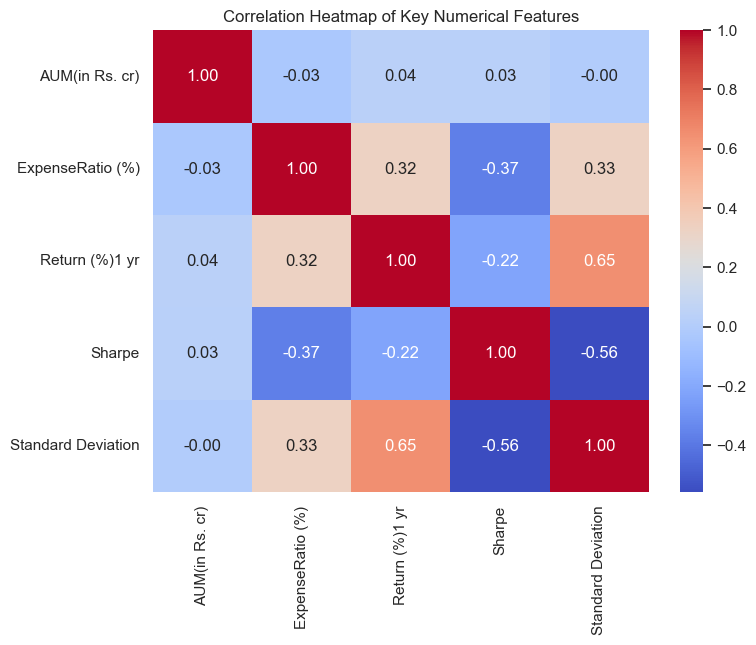

In [39]:
corr_features = [
    'AUM(in Rs. cr)',
    'ExpenseRatio (%)',
    'Return (%)1 yr',
    'Sharpe',
    'Standard Deviation'
]

plt.figure(figsize=(8, 6))
sns.heatmap(
    df[corr_features].corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlation Heatmap of Key Numerical Features')
plt.show()


- AUM shows weak correlation with returns, indicating fund size does not guarantee higher performance.
- Expense Ratio has a slight negative relationship with returns, suggesting higher costs may reduce gains.
- Sharpe Ratio is negatively correlated with Standard Deviation, indicating better risk-adjusted returns for lower volatility funds.
- Returns show moderate positive correlation with Sharpe Ratio.

## Final Insights & Conclusion

### Key Insights

1. The mutual fund dataset contains a wide range of schemes with varying risk, return, and expense structures.
2. Assets Under Management (AUM) is highly skewed, indicating that only a few funds manage very large assets while most remain small.
3. Expense Ratio shows a slight negative relationship with returns, suggesting that higher costs may reduce investor gains.
4. Risk-related metrics such as Standard Deviation, Beta, and Sharpe Ratio provide better insight into fund performance than returns alone.
5. Large-cap dominated funds generally exhibit lower volatility compared to mid-cap and small-cap funds.
6. Missing values were handled carefully to avoid data leakage and distortion of results.
7. Outliers in AUM and returns reflect real-world fund distribution and were retained for meaningful analysis.

### Conclusion

This Exploratory Data Analysis helped uncover important patterns and relationships in mutual fund performance.
Rather than focusing only on returns, the analysis highlights the importance of risk-adjusted metrics
such as Sharpe Ratio and Standard Deviation for better investment decisions.

The findings from this analysis can assist investors, analysts, and financial institutions in
understanding fund behavior and making informed decisions.

This project demonstrates the effective use of data cleaning, univariate, bivariate, and multivariate
analysis techniques to extract actionable insights from financial data.
